# Real-time Forecasts
---

Here we will focus on the latest forecast of [2 metre temperature](https://codes.ecmwf.int/grib/param-db/167) of the **AIFS-Single** over Europe over next seven days.

## 1. Set Up Your Environment and Find ECMWF Open Data
Open data will be downloaded from a publicly available [Amazon S3 Bucket](../datadownload/find-data.md). First, the following Python libraries need to be installed in the current Jupyter kernel:
- `ecmwf-opendata` to download data,
- `earthkit` to analyse data,
- `pandas` to perform powerful operations on datasets,
- `geopandas` to handle geographic data of pandas objects, and
- `plotly` for interactive data visualization.

:::{seealso}
More detailed information about how to install Python packages is available on the [Retrieve Data](../datadownload/data-download.ipynb) website.
:::
If the packages are not installed yet, uncomment the code below and run it.

In [14]:
# !pip3 install earthkit ecmwf-opendata pandas geopandas plotly

In [1]:
from ecmwf.opendata import Client
import earthkit.data as ekd

import os

# import pandas as pd
import geopandas as gpd
import plotly.express as px
# import plotly.graph_objects as go

### Data and plots directories

In [ ]:
DATADIR = './data_dir/'
os.makedirs(DATADIR, exist_ok=True)

PLOTSDIR = './plots/'
os.makedirs(PLOTSDIR, exist_ok=True)

When using the `ls()` method, a list of all the fields in the file we downloaded will be displayed.

In [2]:
filename = f"{DATADIR}2t_0-168h.grib2"

client = Client(source="aws")
client.retrieve(
    date=0,
    time=0,
    step=[step for step in range(0, 174, 6)],
    stream="oper",
    type="fc",
    levtype="sfc",
    levelist=[],
    param="2t",
    model="aifs-single",
    target=filename
    )
data = ekd.from_source("file", filename)
data.ls()

Model 'aifs-single' does not match the client model 'ifs', using model 'aifs-single' from retrieve
                                                                                

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250823,0,0,fc,None,regular_ll
1,ecmf,2t,heightAboveGround,2,20250823,0,6,fc,None,regular_ll
2,ecmf,2t,heightAboveGround,2,20250823,0,12,fc,None,regular_ll
3,ecmf,2t,heightAboveGround,2,20250823,0,18,fc,None,regular_ll
4,ecmf,2t,heightAboveGround,2,20250823,0,24,fc,None,regular_ll
5,ecmf,2t,heightAboveGround,2,20250823,0,30,fc,None,regular_ll
6,ecmf,2t,heightAboveGround,2,20250823,0,36,fc,None,regular_ll
7,ecmf,2t,heightAboveGround,2,20250823,0,42,fc,None,regular_ll
8,ecmf,2t,heightAboveGround,2,20250823,0,48,fc,None,regular_ll
9,ecmf,2t,heightAboveGround,2,20250823,0,54,fc,None,regular_ll


:::{warning}
The following warning is displayed when we retrieve our data using ECMWF Open Data API for the very first time: “Model 'aifs-single' does not match the client model 'ifs', using model 'aifs-single' from retrieve”.
:::

We specify the step range of data that will be returned when we apply the `sel()` function.

In [3]:
d = data.sel(stepRange="12")
d.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250823,0,12,fc,None,regular_ll


The selected data can be converted to a `pandas` DataFrame using `.to_pandas()` method. When using the `head()` method, a selected number of rows `n` (`n=5` by default) and information about the fields will be displayed.

In [4]:
df = data.sel(stepRange="12").to_pandas()
df.head()

,lat,lon,value,datetime,domain,date,time,expver,class,type,stream,step,levtype,param,model
0,90.0,-180.00,272.155228,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
1,90.0,-179.75,272.155228,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
2,90.0,-179.50,272.155228,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
3,90.0,-179.25,272.155228,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
4,90.0,-179.00,272.155228,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single


We need to convert 2-metre temperature from Kelvin to Celsius.

In [5]:
df['value'] = df['value'] - 273.15
df

,lat,lon,value,datetime,domain,date,time,expver,class,type,stream,step,levtype,param,model
0,90.0,-180.00,-0.994772,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
1,90.0,-179.75,-0.994772,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
2,90.0,-179.50,-0.994772,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
3,90.0,-179.25,-0.994772,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
4,90.0,-179.00,-0.994772,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038235,-90.0,178.75,-44.182272,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
1038236,-90.0,179.00,-44.182272,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
1038237,-90.0,179.25,-44.182272,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single
1038238,-90.0,179.50,-44.182272,2025-08-23 12:00:00,g,20250823,0,0001,ai,fc,oper,12,sfc,2t,aifs-single


In [17]:
gdf_2t = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf_2t.geometry

0             POINT (-180 90)
1          POINT (-179.75 90)
2           POINT (-179.5 90)
3          POINT (-179.25 90)
4             POINT (-179 90)
                  ...        
1038235    POINT (178.75 -90)
1038236       POINT (179 -90)
1038237    POINT (179.25 -90)
1038238     POINT (179.5 -90)
1038239    POINT (179.75 -90)
Name: geometry, Length: 1038240, dtype: geometry

In [18]:
gdf_2t.geometry.x

0         -180.00
1         -179.75
2         -179.50
3         -179.25
4         -179.00
            ...  
1038235    178.75
1038236    179.00
1038237    179.25
1038238    179.50
1038239    179.75
Length: 1038240, dtype: float64

## 2. GeoJSON data

[Our GeoJSON file](https://geojson-maps.kyd.au/) containing a vector map of the globe can be read with the `geopandas` package.

In [12]:
countries = gpd.read_file("./GeoJSON_data/globe.geojson")
countries.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,None,None,None,None,None,None,None,None,CRI.geojson,"POLYGON ((-82.5462 9.56613, -82.93289 9.47681,..."
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,None,None,None,None,None,None,None,None,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,None,None,None,None,None,None,None,None,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,None,None,None,None,None,None,None,None,DOM.geojson,"POLYGON ((-71.7083 18.045, -71.68774 18.31666,..."
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,None,None,None,None,None,None,None,None,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


In [16]:
coor = countries.geometry
coor

0      POLYGON ((-82.5462 9.56613, -82.93289 9.47681,...
1      POLYGON ((-83.65561 10.93876, -83.89505 10.726...
2      POLYGON ((-71.71236 19.71446, -71.62487 19.169...
3      POLYGON ((-71.7083 18.045, -71.68774 18.31666,...
4      POLYGON ((-89.35333 14.42413, -89.05851 14.340...
                             ...                        
172    POLYGON ((165.77999 -21.08, 166.59999 -21.7000...
173    MULTIPOLYGON (((162.11902 -10.48272, 162.39865...
174    MULTIPOLYGON (((167.2168 -15.89185, 167.84488 ...
175    MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ...
176    POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...
Name: geometry, Length: 177, dtype: geometry

## 3. Data visualisation

The animation below shows analysis of 2-metre temperature for today at 00 UTC.

In [20]:
#geo_df = gpd.read_file("./GeoJSON_data/ne_110m_admin_0_boundary_lines_land.shp")

#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_geo(gdf_2t,
                    lat=gdf_2t.geometry.y,
                    lon=gdf_2t.geometry.x,
                    hover_name="value")
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mapbox_token'

In [15]:
#fig = px.choropleth(df,
#                    lat=df.lat,
#                    lon=df.lon,
#                    #geojson=countries,
#                    #locations="geometry",
#                    color="value",
#                    #hover_name="country",
#                    animation_frame="step",
#                    range_color=[-40, 50])

fig = px.scatter_map(df,
                        lat=df.lat,
                        lon=df.lon,
                        hover_name="value",
                        height=500, width=1000,
                        zoom=15)
fig.show()

TypeError: scatter_map() got an unexpected keyword argument 'mapbox_style'

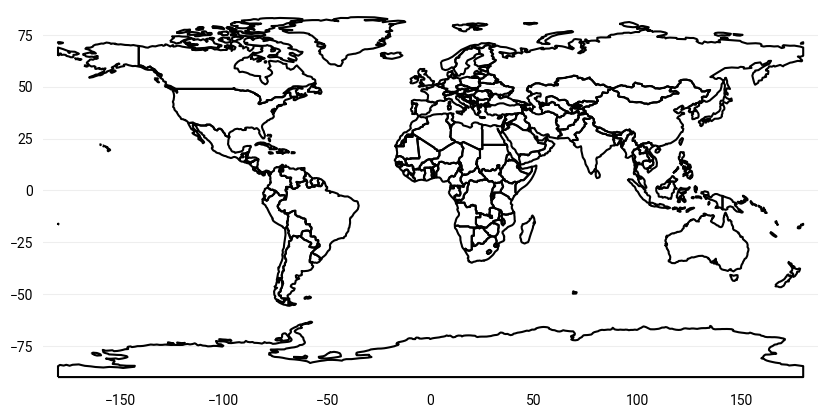

In [24]:
fig, ax = plt.subplots(figsize = (10,8))
countries.boundary.plot(ax = ax, edgecolor = 'black')
#plt.pcolormesh(df.lon, df.lat, df.value, cmap='RdBu_r')
#ax.axis('off')
plt.show()

_To be continued..._